
Activation functions: ['sigmoid', 'tanh', 'relu']
Enter an activation function: tanh
Enter number of iterations: 1000
Enter learning rate: 0.1


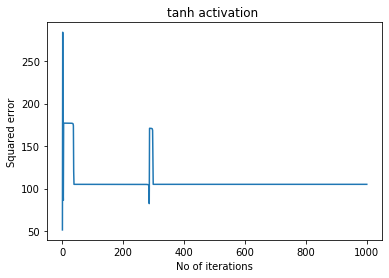


After 1000 iterations, the total error is 104.9999999999981
The final weight vectors are (starting from input to output layers)

W(1) - Input Layer to Hidden Layer 1:
 [[-1.92600926 -1.83010121  0.0327132   0.70120231 -1.41777193]
 [-2.15218197 -2.14520711  0.39539027  0.52936046 -0.38770273]
 [-0.37826368 -0.3018673  -0.31476798  1.10208434 -1.17876844]
 [ 0.38113581 -0.26182645  0.14918227 -0.65553504 -0.64497638]]

W(2) - Hidden Layer 1 to Hidden Layer 2:
 [[ 2.99645149  2.53920411 -2.6358318 ]
 [ 2.36061332  0.57339112 -1.86062674]
 [ 0.27206588  1.36817728 -0.5084747 ]
 [-0.63411019  0.07734549  2.01258993]
 [ 3.05104758  1.83830169 -1.4243466 ]]

W(3) - Hidden Layer 2 to Output Layer:
 [[-7.058561   -5.08338326 -8.15244615]
 [-4.09021504 -3.38620166 -9.20373907]
 [ 5.13038543  7.88660118  1.97207961]]

Test Error: 
44.99999999999921


In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import impute
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import sys

class NeuralNet:
    def __init__(self, train, h1 = 5, h2 = 3):
        np.random.seed(1)
        # train refers to the training dataset
        # test refers to the testing dataset
        # h1 and h2 represent the number of nodes in 1st and 2nd hidden layers

        raw_input = train #pd.read_csv(train, header = None)
        
        # TODO: Remember to implement the preprocess method
        self.X, self.y = self.preprocess(raw_input)
        self.error = []
        #
        # Find number of input and output layers from the dataset
        #
        input_layer_size = len(self.X[0])
        if not isinstance(self.y[0], np.ndarray):
            output_layer_size = 1
        else:
            output_layer_size = len(self.y[0])

        # assign random weights to matrices in network
        # number of weights connecting layers = (no. of nodes in previous layer) x (no. of nodes in following layer)
        self.w01 = 2 * np.random.random((input_layer_size, h1)) - 1
        self.X01 = self.X
        self.delta01 = np.zeros((input_layer_size, h1))
        self.w12 = 2 * np.random.random((h1, h2)) - 1
        self.X12 = np.zeros((len(self.X), h1))
        self.delta12 = np.zeros((h1, h2))
        self.w23 = 2 * np.random.random((h2, output_layer_size)) - 1
        self.X23 = np.zeros((len(self.X), h2))
        self.delta23 = np.zeros((h2, output_layer_size))
        self.deltaOut = np.zeros((output_layer_size, 1))
    
    #
    # TODO: I have coded the sigmoid activation function, you need to do the same for tanh and ReLu
    #

    def __activation(self, x, activation): 
        if activation == "sigmoid":
            return self.__sigmoid(x)
        # tanh activation
        if activation == "tanh":
            return self.__tanh(x)
        # ReLu activation
        if activation == "relu":
            return self.__relu(x)

    #
    # TODO: Define the function for tanh, ReLu and their derivatives
    #

    def __activation_derivative(self, x, activation): 
        if activation == "sigmoid":
            return self.__sigmoid_derivative(x)
        if activation == "tanh":
            return self.__tanh_derivative(x)
        if activation == "relu":
            return self.__relu_derivative(x)

    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # activation function tanh
    def __tanh(self, x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    
    # activation function relu
    def __relu(self, x):
        return np.maximum(0, x)

    # derivative of sigmoid function, indicates confidence about existing weight

    def __sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def __tanh_derivative(self, x):
        return 1 - (x * x)
    
    def __relu_derivative(self, x):
        x[x >= 0] = 1
        x[x < 0] = 0
        return x

    #
    # TODO: Write code for pre-processing the dataset, which would include standardization, normalization,
    #   categorical to numerical, etc
    #

    def preprocess(self, D):
        ncols = len(D.columns)
        nrows = len(D.index)
        
        X = D.iloc[:, 0:(ncols -1)].values.reshape(nrows, ncols-1)
        y = D.iloc[:, (ncols-1):].values.reshape(nrows, 1)
        
        num_imputer = impute.SimpleImputer(strategy='mean') 
        X[:, :] = num_imputer.fit_transform(X[:, :])
        X = preprocessing.normalize(X)
    
        str_imputer = impute.SimpleImputer(strategy='constant') 
        y[:, :] = str_imputer.fit_transform(y[:, :])
        
        one_hot_encoder = preprocessing.OneHotEncoder()
        y = one_hot_encoder.fit_transform(y).toarray()

        return (X, y)

    # Below is the training function

    def train(self, activation, max_iterations = 1000, learning_rate = 0.0005):
        for iteration in range(max_iterations):
            out = self.forward_pass(activation)
            error = 0.5 * np.power((out - self.y), 2)
            self.error.append(np.sum(error))
            self.backward_pass(out, activation)
            update_layer2 = learning_rate * self.X23.T.dot(self.deltaOut)
            update_layer1 = learning_rate * self.X12.T.dot(self.delta23)
            update_input = learning_rate * self.X01.T.dot(self.delta12)
            
            self.w23 += update_layer2
            self.w12 += update_layer1
            self.w01 += update_input
            
        plt.plot([v+1 for v in range(max_iterations)], self.error) 
        # naming the x axis 
        plt.xlabel('No of iterations') 
        # naming the y axis 
        plt.ylabel('Squared error') 
        # title to graph 
        plt.title(activation + " activation ") 
        # function to show the plot 
        plt.show()

        print("\nAfter " + str(max_iterations) + " iterations, the total error is " + str(np.sum(error)))
        print("The final weight vectors are (starting from input to output layers)")
        print("\nW(1) - Input Layer to Hidden Layer 1:\n " + str(self.w01))
        print("\nW(2) - Hidden Layer 1 to Hidden Layer 2:\n " + str(self.w12))
        print("\nW(3) - Hidden Layer 2 to Output Layer:\n " + str(self.w23))
        

    def forward_pass(self, activation):
        # pass our inputs through our neural network
        in1 = np.dot(self.X, self.w01 )
        self.X12 = self.__activation(in1, activation)   
        in2 = np.dot(self.X12, self.w12)
        self.X23 = self.__activation(in2, activation)   
        in3 = np.dot(self.X23, self.w23)
        out = self.__activation(in3, activation)        
        return out

    def backward_pass(self, out, activation):
        # pass our inputs through our neural network
        self.compute_output_delta(out, activation)
        self.compute_hidden_layer2_delta(activation)
        self.compute_hidden_layer1_delta(activation)

    def compute_output_delta(self, out, activation):
        self.deltaOut = (self.y - out) * (self.__activation_derivative(out, activation))

    def compute_hidden_layer2_delta(self, activation): 
        self.delta23 = (self.deltaOut.dot(self.w23.T)) * (self.__activation_derivative(self.X23, activation))

    def compute_hidden_layer1_delta(self, activation): 
        self.delta12 = (self.delta23.dot(self.w12.T)) * (self.__activation_derivative(self.X12, activation))


    # TODO: Implement the predict function for applying the trained model on the  test dataset.
    # You can assume that the test dataset has the same format as the training dataset
    # You have to output the test error from this function

    def predict(self, test, activation):
        raw_test_input = test #pd.read_csv(test, header = None)
        X, y = self.preprocess(raw_test_input)
        self.X = X
        self.y = y
        
        out = self.forward_pass(activation)
#         print("\nTest Output:\n" + str(out))
        error = 0.5 * np.power((out - self.y), 2)
        return error
 

if __name__ == "__main__":
        a_functions = ['sigmoid', 'tanh', 'relu']
        print("\nActivation functions: " + str(a_functions))
        activation = input("Enter an activation function: ")
        if activation not in a_functions:
            print("Please enter a function from the list: " + str(a_functions))
            activation = input("Enter an activation function: ")
        iteration = input("Enter number of iterations: ")
        l_rate = input("Enter learning rate: ")
        
        raw_input = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
        raw_input = raw_input.sample(frac = 1)
        train_input = raw_input[:105]
        test_input = raw_input[105:]
        
        train_input, test_input = train_test_split(raw_input, test_size=0.3, random_state=42)
        
        neural_network = NeuralNet(train_input)
        neural_network.train(activation, int(iteration), float(l_rate))
        testError = neural_network.predict(test_input, activation)

        print("\nTest Error: ")
        print(str(np.sum(testError)))

